Loading required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
%matplotlib inline

/tmp/ipykernel_26676/2112055845.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data From CSV File  

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
df['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Visualizing the data

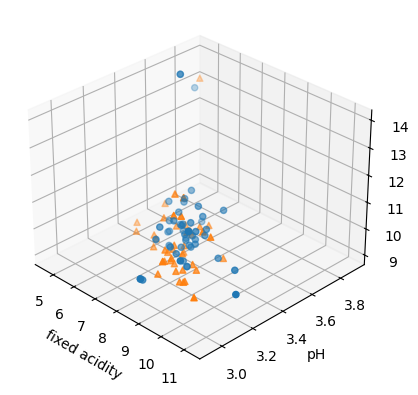

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

c1 = df[df['quality'] == "good"][0:50]
c2 = df[df['quality'] == "bad"][0:50]

ax.scatter(c1['fixed acidity'], c1['pH'], c1["alcohol"], marker='o')
ax.scatter(c2['fixed acidity'], c2['pH'], c2["alcohol"], marker="^")

ax.set_xlabel('fixed acidity')
ax.set_ylabel('pH')
ax.set_zlabel('alcohol')
ax.view_init(30, -45)
plt.show()



### Feature set


In [6]:
X = np.asanyarray(df.iloc[:, 0:-1])
X[0:5]


array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [7]:
Y = np.asanyarray(df.iloc[:, -1])
Y[0:5]

array(['bad', 'bad', 'bad', 'good', 'bad'], dtype=object)

### Preprocessing Data


Since the target column is not in numerical form we are converting the data

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 0, ..., 1, 0, 1])

In [9]:
# set hyper-parameters and call init
regularization_strength = 10000
learning_rate = 0.001

In [10]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0 # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    dw = np.zeros(len(W))
    print(np.array([Y_batch]))

    Y_batch = np.array([Y_batch])
    X_batch = np.array([X_batch]) # gives multidimensional array
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    print(dw)
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
            dw += di

                
    dw = dw/len(Y_batch) # average
    return dw

In [11]:
cost_l = []

def sgd(features, outputs):
    max_epochs = 25
    weights = np.zeros(features.shape[1])
    prev_cost = float("inf")
    cost_threshold = 0.01 # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
        weights = weights - (learning_rate * ascent)
        if  epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            cost_l.append(float(cost))
    return weights

### Splitting the data into Train and Test Sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state=15)


### Training the Model

In [13]:
# train the model
print("training started...")
Wgt = sgd(np.asanyarray(X_train),np.asanyarray( y_train))
print("training finished.")
print("weights are: {}".format(Wgt))

training started...
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 0. 0. 0. 0. 

### Predicting using the model

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# testing the model
print("testing the model...")
y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(np.asanyarray(X_train)[i], Wgt))
    y_train_predicted = np.append(y_train_predicted, yp)

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(np.asanyarray(X_test)[i], Wgt))
    y_test_predicted = np.append(y_test_predicted, yp)



testing the model...


### Evaluation of the model

In [15]:
print("accuracy on test dataset: {}".format(accuracy_score(y_test,y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test,y_test_predicted)))
print("precision on test dataset: {}".format(precision_score(y_test,y_test_predicted)))

accuracy on test dataset: 0.5475
recall on test dataset: 1.0
precision on test dataset: 0.5475


The model built using SVM Gradient Descent has an accuracy of 54.75%